# Exercise 3: Learning from Data

In this exercise, you will train different types of regression and classification models on two datasets. You will be graded based on a combination of your code producing the expected results, your written responses to the questions and a passing leaderboard score in the final exercise.

### 3.1 Linear / Logistic Regression for digit recognition

In this part you will experiment with two different types of prediction models, and qualitatively + quantitatively compare them. You will be working with the classic MNIST dataset, which we can load from `sklearn.datasets`.

In [106]:
# Importing the dataset
from sklearn import datasets
digits = datasets.load_digits();

Here we plot the first few digits and their labels. Apparently they are in order, but our upcoming models will not rely on this.

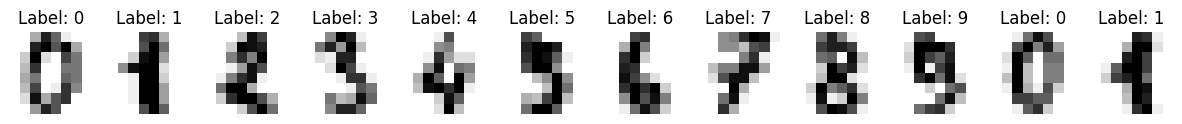

In [107]:
import matplotlib.pyplot as plt

_, axes = plt.subplots(nrows=1, ncols=12, figsize=(15, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Label: %i" % label)

### A: Warmup Exercise

Use the `train_test_split` function from `sklearn.model_selection` twice to split the data into train, validation, and test sets, with a distribution of 80%, 10%, and 10% respectively. Use `random_state=0` for reproducibility.
Check out the documentation to figure out how to set the parameters to get the desired split.

In [108]:
# INSERT YOUR CODE HERE. ASSIGN TO THE FOLLOWING VARIABLES, X_train, X_val, X_test, y_train, y_val, y_test
from sklearn.model_selection import train_test_split

data = digits.images.reshape((len(digits.images), -1))

X_train, X_test, y_train, y_test = train_test_split(
    data, 
    digits.target, 
    test_size=1/10, 
    shuffle=False, 
    random_state=0
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, 
    y_train, 
    test_size=1/9, 
    shuffle=False, 
    random_state=0
)

print(len(X_train), len(y_train))
print(len(X_val), len(y_val))
print(len(X_test), len(y_test))

1437 1437
180 180
180 180


Now let's check out the returned training data, which is of the type `numpy.ndarray`, which you might have seen already. We want to make sure the classes are balanced, e.g. we don't have a lot more 4's than 5's.
 - How many images do we have for the train, validation, and test sets?
 - What is the distribution of the training labels? Comment on whether the classes are balanced.

In [109]:
# CALCULATE AND WRITE YOUR ANSWERS HERE
import numpy as np

print(f'{len(y_train)} training images')
print(f'{len(y_val)} validation images')
print(f'{len(y_test)} test images')

for i in range(10):
    amount = np.count_nonzero(y_train == i)
    print(f'{amount} of label {i} in training set')

1437 training images
180 validation images
180 test images
143 of label 0 in training set
146 of label 1 in training set
142 of label 2 in training set
146 of label 3 in training set
144 of label 4 in training set
145 of label 5 in training set
144 of label 6 in training set
143 of label 7 in training set
141 of label 8 in training set
143 of label 9 in training set


The classes are fairly balanced as to not cause problems or biases.

### B: Programming Exercise

Let's build a model that learns to predict the digit given the image. We'll first try our hand at linear regression. We will use the `LinearRegression` class from `sklearn.linear_model`. Again, check out the documentation on how to use it. We will use the `fit` method to train the model, and the `predict` method to make predictions on the test set.
Afterwards, evaluate the model using functions from `sklearn.metrics` module.

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

# Training
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
mse = format(mean_squared_error(y_test, y_pred), '.2f')
acc = format(accuracy_score(y_test, np.round(y_pred)), '.2f')

Should we not be using the X_val and y_val for something?

LinearRegression MSE:  4.81
LinearRegression accuracy:  0.15


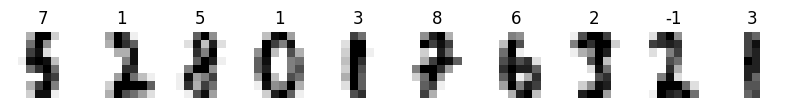

In [111]:
# DO NOT INSERT OR CHANGE ANYTHING BELOW
print("LinearRegression MSE: ", mse)
print("LinearRegression accuracy: ", acc)

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, np.round(y_pred)):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("%i" % np.round(prediction))

### C: Programming Exercise

Now, let's model the task differently.
You will use the `LogisticRegression`, again included in the module `sklearn.linear_model`, and again, check out the documentation to see how to use it. Fit the model and make predictions on the test set.

You are asked to produce output with the same structure as in the above programming exercise (two printouts and one image), but for a different model this time.

LinearRegression MSE:  1.67
LinearRegression accuracy:  0.93


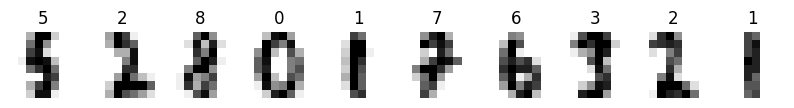

In [112]:
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression

# Training
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Evaluation
y_pred = logistic_model.predict(X_test)
mse = format(mean_squared_error(y_test, y_pred), '.2f')
acc = format(accuracy_score(y_test, y_pred), '.2f')

print("LinearRegression MSE: ", mse)
print("LinearRegression accuracy: ", acc)

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, np.round(y_pred)):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("%i" % np.round(prediction))

This model is a lot better. I am still confused about why we use MSE for such a model though, since I calculate it by taking the amount of numbers it off by. Accuracy makes a lot of sence though.

### Written Questions

1a) Describe the trends you observe in the results. Is there anything interesting or unexpected?

1b) How do the results compare to the linear regression model?

1c) What do you think is the reason for this?

## Exercise 3.2: Determine habitability

**Prediction task**: Build a logistic model for exoplanet habitability

Your team is tasked with applying data science and machine learning techniques to analyze exoplanet data from the famous NASA Exoplanet Archive (NEA). Among 372 features, your goal is to build a model that predicts whether an exoplanet is potentially habitable (1) or non-habitable (0).


**Evaluation metric**: F1-score


Due to the highly imbalanced nature of the data—habitable planets are much rarer than their non-habitable counterparts—the evaluation metric is the F1-score, which balance precision and recall. This helps us know whether your model is truly effective at identifying the minority (habitable) class rather than simply achieving high overall accuracy by predicting the majority class.



**Feature engineering**

The most minimal version of a working solution should give you around 50-60% F1.

You can improve this performance substantially—achieve closer to **85-90%** F1—by feature engineering and data preprocessing:
- **Feature selection:** Only choosing relevant features (Hint: Look out for anything temperature-related)
- **Feature creation:** Earth Similarity Index (see below)
- **Feature transformation:** Scaling and standardization
- **Imputation** of NaN/unknown values
- **Oversampling** to increase the minority class

Consider conducting exploratory data analysis (EDA) to gain useful insight about the dataset and leveraging a [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) to streamline your steps. For more information see the description on the [Kaggle page](https://www.kaggle.com/competitions/gds-exercise-3-2025-).


Good luck, and we look forward to seeing your solutions!



### D: Programming Exercise

1. Create an account on Kaggle to join the Kaggle competition: [GDS Exercise 3 – 2025](https://www.kaggle.com/competitions/gds-exercise-3-2025-). You can either use your real name, or tell us your Kaggle username, so we can grade you.
2. Download the [training and test data](https://www.kaggle.com/competitions/gds-exercise-3-2025-/data). Check out the Dataset Description for more information about the data and your task.
2. Load the training data file `train.npz` and split it into `train`, `val`, and `test` splits.
3. Use a linear or logistic regression model to fit the `train` split. Use the `val` split for model selection and hyperparameter optimization, while reserving the `test` split for evaluation exclusively. (You should measure performance using f1-score).

In [113]:
# YOUR CODE HERE
# >

### E: Calculate the [Earth Similarity Index](https://en.wikipedia.org/wiki/Earth_Similarity_Index?wprov=sfla1) (Optional)
Evidently, astronomers have observed Earth to be a very habitable planet (1) with their telescopes. As such, we make the remark that planets with properties similar to Earth tend to make excellent candidates for planet habitability.


Earth Similarity Index (ESI) is a metric defined as:

$$
\text{ESI} = \prod_{i=1}^n \left(1 - \left| \frac{x_i - x_{i,\oplus}}{x_i + x_{i,\oplus}} \right| \right)^\frac{w_i}{n}
$$

where  
$ x_i $ and $ x_{i,\oplus} $ are features of the extraterrestrial body and of Earth respectively,  
$ w_i $ is the weighted exponent of each feature, and  
$ n $ is the total number of features.

The weight assigned to each feature,
$w_i$, are free parameters that can be chosen to emphasize certain characteristics over others, e.g. surface temperature is often given a much higher weight because maintaining liquid water is crucial.

1. For each selected feature, determine $w_i$. You may default these to 1 (equal weight) or draw on domain knowledge.

2. Compute the `ESI` for each exoplanet in `X_train` and `X_test`. Check whether your results approximately match those in `exampleESI.csv`

3. When confident in you calculations, add `ESI` as a new column in both sets.

4. Retrain your logistic model with your new `ESI` feature included.

In [114]:
# YOUR CODE HERE
# >

### F: Unlabelled data evaluation

After downloading the unlabeled [test.npz](https://www.kaggle.com/competitions/gds-exercise-3-2025-/data), you will make predictions in `y_pred` for all of the unlabeled exoplanets in `X_test`. You can submit your best predictions to Kaggle three times/day.

This programming exercise is considered **passed** if you achieve  $\text{F1-Score} \ge 0.80$ on the [leaderboard](https://www.kaggle.com/competitions/gds-exercise-3-2025-/leaderboard) using only a logistic model.

In [115]:
# LOAD THE TEST SET AND MAKE PREDICTIONS. ASSIGN THE PREDICTIONS TO THE VARIABLE y_pred.
# >

sample = pd.read_csv('sample_submission.csv') # Load `sample_submission.csv` to validate original indices
sample['P_HABITABLE'] = y_pred  # assuming y_pred contains your predictions
sample.to_csv('submission.csv', index=False)

# NOW YOU CAN UPLOAD THE submission.csv FILE TO KAGGLE AND SEE YOUR ACCURACY

NameError: name 'pd' is not defined

### Written Questions

2a) Explain the different techniques and their purpose in your code for Programming Exercise D.

2b) Which techniques were not useful in improving performance on this task?

2c) Optional: Consider the exoplanet `Kepler-438 b` with `ESI=0.832838` and `P_HABITABLE=0`.
Despite its high ESI, this planet gets violently nuked by its own sun every three Earth months. Discuss how a loss of granularity when designing a composite index, like the ESI, can result in masking outlier behavior.  